# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Scott Williamson

https://github.com/scottryanw


In [27]:
import requests
import pickle
import spacy
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

### Question 1

1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [28]:
import requests
from bs4 import BeautifulSoup
import pickle

# URL of the webpage to scrape
url = "https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/"

# Send a GET request to fetch the raw HTML content
response = requests.get(url)

if response.status_code == 200:
    # Parse the HTML content with BeautifulSoup
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Extract the article HTML
    article_html = soup.find('article')  
    
    # Check if the article was found
    if article_html:
        # Serialize the HTML content and save it to a .pkl file
        with open("article_html.pkl", "wb") as file:
            pickle.dump(str(article_html), file)
        print("Article HTML successfully saved to article_html.pkl")
    else:
        print("Article tag not found in the HTML.")
else:
    print(f"Failed to fetch the webpage. Status code: {response.status_code}")


Article HTML successfully saved to article_html.pkl


### Question 2

2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [29]:
import pickle
from bs4 import BeautifulSoup

file_path = "article_html.pkl"

# Load the HTML content
with open(file_path, "rb") as file:
    article_html = pickle.load(file)

# Parse with BeautifulSoup and print the text
soup = BeautifulSoup(article_html, 'html.parser')
text = soup.get_text()
print(text)




How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype laser headlight assemblies undergoing testing.
The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile. Obviously, coherent beams of monochromatic light would make for poor illumination outside o

### Question 3

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [30]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
from collections import Counter

# Load spaCy's trained pipeline
nlp = spacy.load('en_core_web_sm')

# Process the text with spaCy
doc = nlp(text)

# Filter tokens: remove stopwords, punctuation, and whitespace
tokens = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space]

# Count token frequencies
token_freq = Counter(tokens)

# Get the 5 most common tokens
most_common_tokens = token_freq.most_common(5)

# Print results
print("Most Common Tokens:")
for token, freq in most_common_tokens:
    print(f"Token: '{token}', Frequency: {freq}")


Most Common Tokens:
Token: 'laser', Frequency: 35
Token: 'headlights', Frequency: 19
Token: 'headlight', Frequency: 11
Token: 'technology', Frequency: 10
Token: 'led', Frequency: 10


### Question 4

4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [31]:
import spacy
from collections import Counter

# Load spaCy's trained pipeline
nlp = spacy.load("en_core_web_sm")

# Process the text with spaCy
doc = nlp(text)

# Filter out tokens that are punctuation, stopwords, or whitespace, and extract lemmas
lemmas = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space]

# Count the frequency of lemmas
lemma_freq = Counter(lemmas)

# Determine the 5 most common lemmas
most_common_lemmas = lemma_freq.most_common(5)

# Print results
print("Most Common Lemmas:")
for lemma, freq in most_common_lemmas:
    print(f"Lemma: '{lemma}', Frequency: {freq}")


Most Common Lemmas:
Lemma: 'laser', Frequency: 40
Lemma: 'headlight', Frequency: 28
Lemma: 'beam', Frequency: 12
Lemma: 'technology', Frequency: 10
Lemma: 'led', Frequency: 10


### Question 5

5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [32]:
import spacy

# Load spaCy's trained pipeline
nlp = spacy.load("en_core_web_sm")

def score_sentence_by_token(sentence, interesting_tokens):
    """
    Scores a sentence by the frequency of interesting tokens.
    """
    doc = nlp(sentence)
    tokens = [token.text.lower() for token in doc if not token.is_punct and not token.is_space]
    count = sum(1 for token in tokens if token in interesting_tokens)
    return count / len(tokens) if tokens else 0

def score_sentence_by_lemma(sentence, interesting_lemmas):
    """
    Scores a sentence by the frequency of interesting lemmas.
    """
    doc = nlp(sentence)
    lemmas = [token.lemma_.lower() for token in doc if not token.is_punct and not token.is_space]
    count = sum(1 for lemma in lemmas if lemma in interesting_lemmas)
    return count / len(lemmas) if lemmas else 0


# Interesting tokens and lemmas (mock example)
interesting_tokens = ['laser', 'headlight', 'technology', 'light', 'engine']
interesting_lemmas = ['laser', 'headlight', 'technology', 'light', 'engine']

# First sentence of the article
first_sentence = text.split('.')[0]

# Score the first sentence by tokens and lemmas
token_score = score_sentence_by_token(first_sentence, interesting_tokens)
lemma_score = score_sentence_by_lemma(first_sentence, interesting_lemmas)

# Print the results
print(f"Token Score for first sentence: {token_score}")
print(f"Lemma Score for first sentence: {lemma_score}")


Token Score for first sentence: 0.06060606060606061
Lemma Score for first sentence: 0.09090909090909091


### Question 6

6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

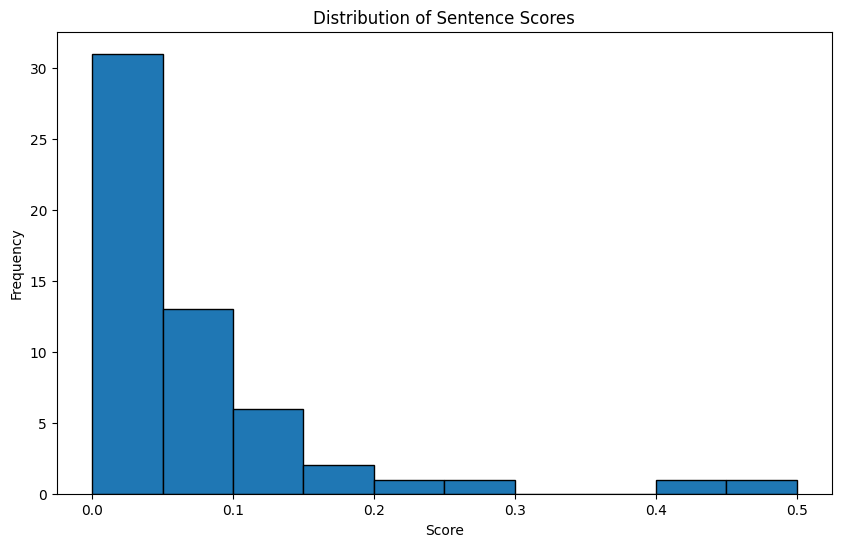

In [33]:
import spacy
import matplotlib.pyplot as plt

# Load spaCy's trained pipeline
nlp = spacy.load("en_core_web_sm")

def score_sentence_by_token(sentence, interesting_tokens):
    """
    Scores a sentence by the frequency of interesting tokens.
    """
    doc = nlp(sentence)
    tokens = [token.text.lower() for token in doc if not token.is_punct and not token.is_space]
    count = sum(1 for token in tokens if token in interesting_tokens)
    return count / len(tokens) if tokens else 0


# Tokenize the text into sentences
doc = nlp(text)
sentences = [sent.text for sent in doc.sents]

# Interesting tokens
interesting_tokens = ['laser', 'headlight', 'technology', 'light', 'engine']

# Calculate scores for each sentence
scores = [score_sentence_by_token(sentence, interesting_tokens) for sentence in sentences]

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(scores, bins=10, edgecolor="black")
plt.title("Distribution of Sentence Scores")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

# Comment: The most common range of scores seems to be between 0 and 0.1.


### Question 7

7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

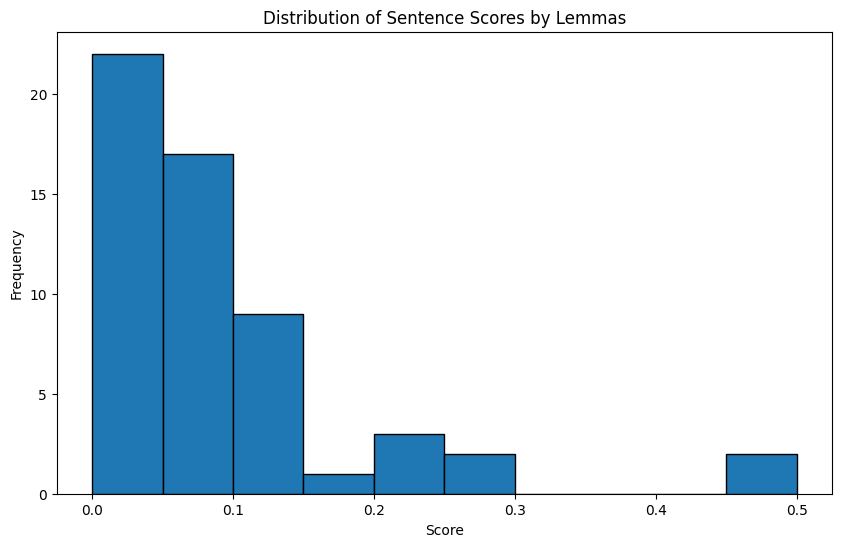

In [34]:
import spacy
import matplotlib.pyplot as plt

# Load spaCy's trained pipeline
nlp = spacy.load("en_core_web_sm")

def score_sentence_by_lemma(sentence, interesting_lemmas):
    """
    Scores a sentence by the frequency of interesting lemmas.
    """
    doc = nlp(sentence)
    lemmas = [token.lemma_.lower() for token in doc if not token.is_punct and not token.is_space]
    count = sum(1 for lemma in lemmas if lemma in interesting_lemmas)
    return count / len(lemmas) if lemmas else 0

# Tokenize the text into sentences
doc = nlp(text)
sentences = [sent.text for sent in doc.sents]

# Interesting lemmas
interesting_lemmas = ['laser', 'headlight', 'technology', 'light', 'engine']

# Calculate scores for each sentence using lemmas
scores_lemmas = [score_sentence_by_lemma(sentence, interesting_lemmas) for sentence in sentences]

# Plot the histogram for lemmas
plt.figure(figsize=(10, 6))
plt.hist(scores_lemmas, bins=10, edgecolor="black")
plt.title("Distribution of Sentence Scores by Lemmas")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

# Comment: The most common range of scores seems to be between 0 and 0.1.


### Question 8

8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

To only consider nouns, omit all non-noun tokens/lemmas like "use", "efficient", and other verbs/adjectives. Change the code to filter for nouns using token.pos_ == "NOUN"

### HTML Export

In [35]:
!jupyter nbconvert --to html web-scraping.ipynb

[NbConvertApp] Converting notebook web-scraping.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 369306 bytes to web-scraping.html
